## The GitHub History of the Scala Language





## Project Description

Open source projects contain entire development histories, such as who made changes, the changes themselves, and code reviews. In this project, you'll be challenged to read in, clean up, and visualize the real-world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). With almost 30,000 commits and a history spanning over ten years, Scala is a mature language. You will find out who has had the most influence on its development and who are the experts.

The dataset includes the project history of Scala retrieved from Git and GitHub as a set of CSV files.


## Project Tasks

    1. Scala's real-world project repository data
    2. Preparing and cleaning the data
    3. Merging the DataFrames
    4. Is the project still actively maintained?
    5. Is there camaraderie in the project?
    6. What files were changed in the last ten pull requests?
    7. Who made the most pull requests to a given file?
    8. Who made the last ten pull requests on a given file?
    9. The pull requests of two special developers
    10. Visualizing the contributions of each developer
    

## 1. Scala's real-world project repository data

With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

    'pulls_2011-2013.csv' contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
    'pulls_2014-2018.csv' contains identical information, and spans from 2014 up to 2018.
    'pull_files.csv' contains the files that were modified by each pull request.



In [1]:
import pandas as pd


pulls_11_13 = pd.read_csv('pulls_2011-2013.csv')
print(pulls_11_13.head())
print(pulls_11_13.shape)


pulls_14_18 = pd.read_csv('pulls_2014-2018.csv')
print(pulls_14_18.head())
print(pulls_14_18.shape)



pull_files = pd.read_csv('pull_files.csv')
print(pull_files.head())
print(pull_files.shape)


        pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z
(3296, 3)
         pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
(2904, 3)
         pid                                   file
0  163314316        test/files/pos/t5638/Among.java
1  163314316       test/files/pos/t5638/Usage.scala
2  163314316             test/files/pos/t9291.scala
3  163314316             test/files/run/t8348.check
4  163314316  test/files/run/t8348/TableColumn.java
(85588, 2)


## 2. Preparing and cleaning the data

First, we will need to combine the data from the two separate pull DataFrames.

Next, the raw data extracted from GitHub contains dates in the ISO8601 format. However, pandas imports them as regular strings. To make our analysis easier, we need to convert the strings into Python's DateTime objects. DateTime objects have the important property that they can be compared and sorted.

The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). To make comparisons easy, we should convert all times to UTC.


In [2]:
df = pd.concat([pulls_11_13, pulls_14_18], ignore_index=True, keys='pid', sort=True)
                                                            # df.merge() on=,  pd.concat() keys=
                                                            #########################################################
print(df.head())
print(df.shape)


df['date'] = pd.to_datetime(df['date'])
print(df.head())


from datetime import datetime

tzone = datetime.today() - datetime.utcnow()
print(tzone)



                   date       pid         user
0  2013-12-31T23:10:55Z  11166973  VladimirNik
1  2013-12-31T16:55:47Z  11161892      Ichoran
2  2013-12-31T02:41:13Z  11153894      Ichoran
3  2013-12-30T23:45:47Z  11151917      rklaehn
4  2013-12-29T17:21:01Z  11131244        qerub
(6200, 3)
                       date       pid         user
0 2013-12-31 23:10:55+00:00  11166973  VladimirNik
1 2013-12-31 16:55:47+00:00  11161892      Ichoran
2 2013-12-31 02:41:13+00:00  11153894      Ichoran
3 2013-12-30 23:45:47+00:00  11151917      rklaehn
4 2013-12-29 17:21:01+00:00  11131244        qerub
-1 day, 18:59:59.999992


In [ ]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two)
#                 df.append() method can do a outer join, set 'reduice_index=', 'sort='


# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc = True)


## 3. Merging the DataFrames

The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.


In [3]:
f_df = df.merge(pull_files, on='pid').sort_values('date')

print(f_df[1060:1090])

                           date     pid     user  \
50341 2012-01-28 08:00:37+00:00  749717  xeno-by   
50340 2012-01-28 08:00:37+00:00  749717  xeno-by   
50339 2012-01-29 15:00:00+00:00  751615  xeno-by   
50338 2012-01-29 15:00:00+00:00  751615  xeno-by   
50330 2012-01-30 12:58:35+00:00  754076   axel22   
50332 2012-01-30 12:58:35+00:00  754076   axel22   
50331 2012-01-30 12:58:35+00:00  754076   axel22   
50334 2012-01-30 12:58:35+00:00  754076   axel22   
50337 2012-01-30 12:58:35+00:00  754076   axel22   
50335 2012-01-30 12:58:35+00:00  754076   axel22   
50336 2012-01-30 12:58:35+00:00  754076   axel22   
50333 2012-01-30 12:58:35+00:00  754076   axel22   
50329 2012-01-30 13:01:49+00:00  754084   axel22   
50328 2012-01-30 15:10:06+00:00  754713  hubertp   
50327 2012-01-30 15:10:06+00:00  754713  hubertp   
50323 2012-01-31 11:01:39+00:00  759725  xeno-by   
50325 2012-01-31 11:01:39+00:00  759725  xeno-by   
50326 2012-01-31 11:01:39+00:00  759725  xeno-by   
50324 2012-0

## 4. Is the project still actively maintained?

The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?

# The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.

# For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.

    A helpful reminder of how to access various components of a date can be found in this exercise of Data Manipulation with pandas

    Additionally, recall that you can group by multiple variables by passing a list to groupby(). This video from Data Manipulation with pandas should help!


# *******************************************************************************************************************

/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


                           date     pid     user  \
51401 2011-12-01 11:42:26+00:00  547003  robinst   
51400 2011-12-01 12:39:40+00:00  547150  odersky   
51399 2011-12-01 12:39:40+00:00  547150  odersky   
51397 2011-12-01 14:03:23+00:00  547354  szeiger   
51398 2011-12-01 14:03:23+00:00  547354  szeiger   

                                                    file year_month  
51401                                         README.rst    2011-12  
51400          src/library/scala/reflect/api/Trees.scala    2011-12  
51399  src/compiler/scala/tools/nsc/transform/LiftCod...    2011-12  
51397                       test/files/run/bitsets.check    2011-12  
51398                       test/files/run/bitsets.scala    2011-12  
             pid
year_month      
2011-12      590
2012-01      489
2012-02      787
2012-03      880
2012-04     3354
...          ...
2017-09      578
2017-10      535
2017-11      172
2017-12      224
2018-01      202

[74 rows x 1 columns]


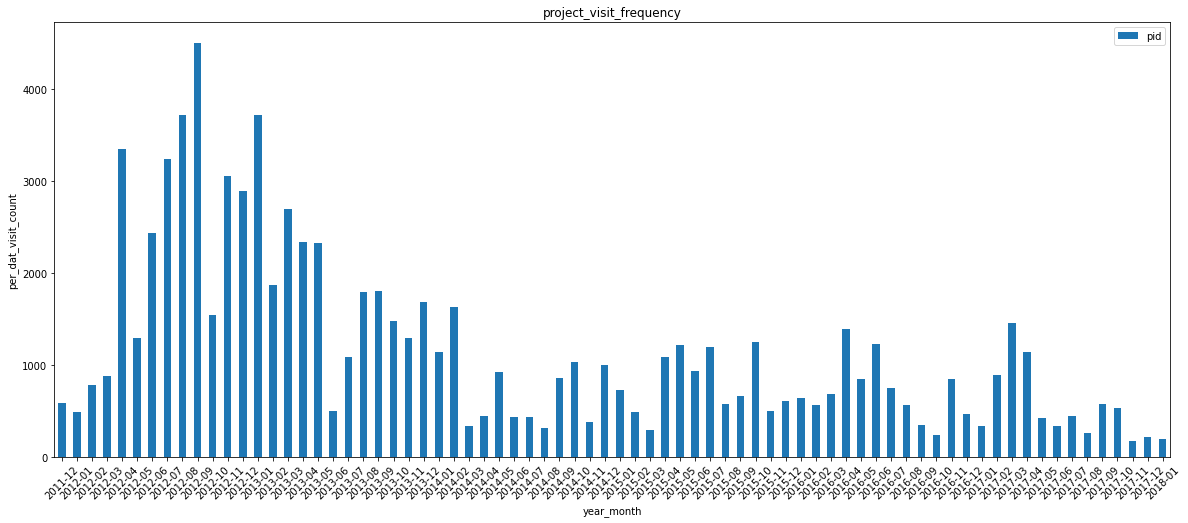

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64


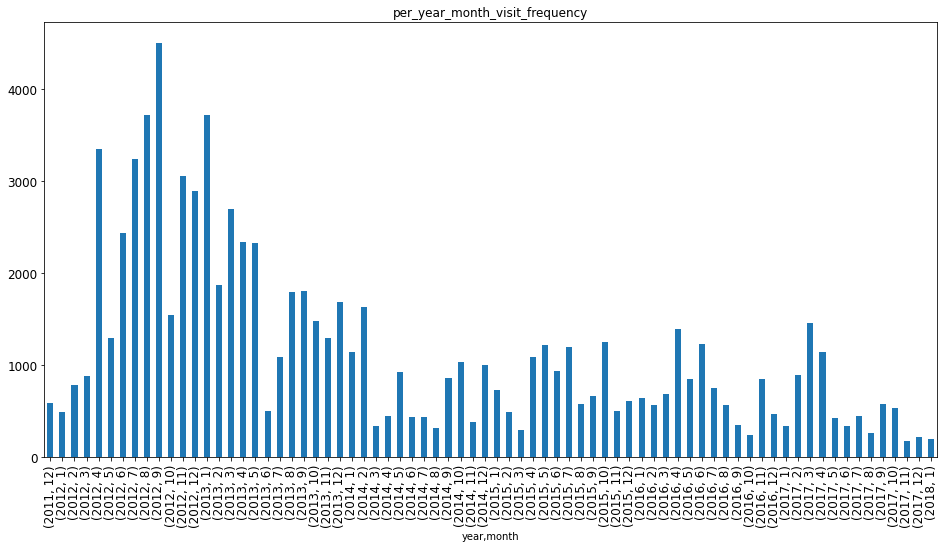

In [4]:
import matplotlib.pyplot as plt


# ***************************************************************************************************************** #
f_df['year_month'] = f_df['date'].dt.to_period('M')
# ***************************************************************************************************************** #

print(f_df.head())


outcome = f_df.pivot_table(values='pid', index='year_month', aggfunc=lambda x: x.count())
print(outcome)



outcome.plot(kind='bar', figsize=(20,8), fontsize=10, rot=45)

#plt.scatter(x=x_axis, y=outcome['pid'], alpha=0.1)

plt.ylabel('per_dat_visit_count')
plt.title('project_visit_frequency')   # pid count by date
plt.show()




f_df['year'] = f_df['date'].dt.year     # AttributeError: 'Series' object has no attribute 'year'
f_df['month'] = f_df['date'].dt.month

counts = f_df.groupby(['year', 'month'])['pid'].count()
print(counts)


counts.plot(kind='bar', figsize=(16,8), title='per_year_month_visit_frequency', fontsize=12)
plt.show()

In [26]:
#print(help(outcome.plot))

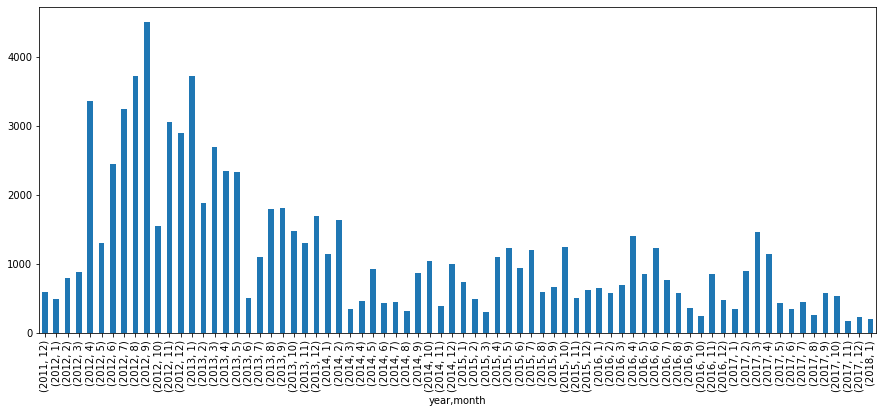

In [37]:
%matplotlib inline


# Create a column that will store the month
f_df['month'] = f_df['date'].dt.month
# ***************************************************************************************************************** #

# Create a column that will store the year
f_df['year'] = f_df['date'].dt.year



# Group by the month and year and count the pull requests
counts = f_df.groupby(['year', 'month'])['pid'].count()
# ***************************************************************************************************************** #
# ***************************************************************************************************************** #


# Plot the results
counts.plot(kind='bar', figsize = (15,6))
plt.show()

In [38]:
#print(dir(pd.Series))

## 5. Is there camaraderie in the project?

The organizational structure varies from one project to another, and it can influence your success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.

In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors. 


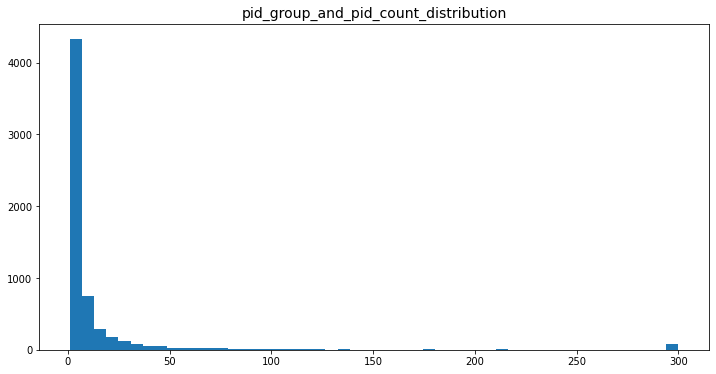

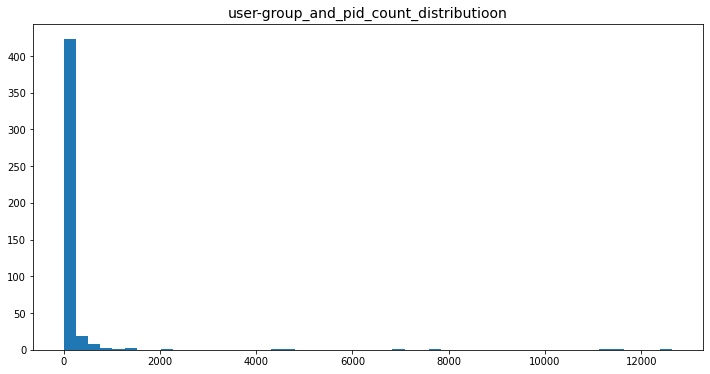

In [5]:
# Afetr reading above words, I have no idea what to do.  Doec 'pid' counts represent the pull_id? Also the user_id


fig = plt.figure(figsize=(12,6))

plt.hist(f_df.groupby('pid')['pid'].count(), bins=50)
plt.title('pid_group_and_pid_count_distribution', fontsize=14)
plt.show()



fig = plt.figure(figsize=(12,6))

plt.hist(f_df.groupby('user')['pid'].count(), bins=50)   ## Group by the submitter the 'user'
plt.title('user-group_and_pid_count_distributioon', fontsize=14)
plt.show()


## 6. What files were changed in the last ten pull requests?

# *******************************************************************************************************************
Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. Focusing on those parts might not the most effective use of our times.


In [6]:
print(f_df.head())



# Identify the last 10 pull requests
recent = f_df.nlargest(20, 'date')
# ***************************************************************************************************************** #

print(recent)


# Join the two data sets
joined_df = recent.merge(pull_files, on='pid')


files = set(joined_df['file_y'])
files



# set(recent['file'])   # Same pull id may m

                           date     pid     user  \
51401 2011-12-01 11:42:26+00:00  547003  robinst   
51400 2011-12-01 12:39:40+00:00  547150  odersky   
51399 2011-12-01 12:39:40+00:00  547150  odersky   
51397 2011-12-01 14:03:23+00:00  547354  szeiger   
51398 2011-12-01 14:03:23+00:00  547354  szeiger   

                                                    file year_month  year  \
51401                                         README.rst    2011-12  2011   
51400          src/library/scala/reflect/api/Trees.scala    2011-12  2011   
51399  src/compiler/scala/tools/nsc/transform/LiftCod...    2011-12  2011   
51397                       test/files/run/bitsets.check    2011-12  2011   
51398                       test/files/run/bitsets.scala    2011-12  2011   

       month  
51401     12  
51400     12  
51399     12  
51397     12  
51398     12  
                           date        pid         user  \
51402 2018-01-16 23:29:16+00:00  163314316       hrhino   
51403 2018-01-16

{'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov.scala',
 'test/files/pos/leibniz-liskov.scala',
 'test/files/pos/leibniz_liskov.scala',
 'test/files/pos/parallel-classloader.scala',
 'test/files/pos/t10568/Converter.java',
 'test/files/pos/t10568/Impl.scala',
 'test/files/pos/t5638/Among.java',
 'test/files/pos/t5638/Usage.scala',
 'test/files/pos/t9291.scala',
 'test/files/run/t8348.check',
 'test/files/run/t8348/TableColumn.java',
 'test/files/run/t8348/T

In [ ]:
recent['file'] output, 

{'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov.scala',
 'test/files/pos/leibniz-liskov.scala',
 'test/files/pos/leibniz_liskov.scala',
 'test/files/pos/t5638/Among.java',
 'test/files/pos/t5638/Usage.scala',
 'test/files/pos/t9291.scala',
 'test/files/run/t8348.check',
 'test/files/run/t8348/TableColumn.java',
 'test/files/run/t8348/TableColumnImpl.java',
 'test/files/run/t8348/Test.scala'}

6179
464


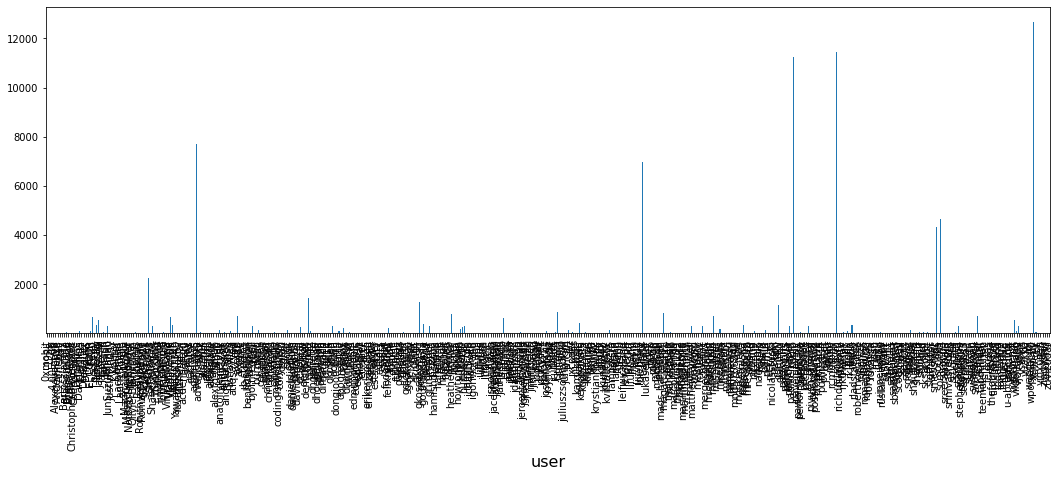

In [130]:
print(f_df['pid'].nunique())

print(f_df['user'].nunique())



user_p_count = f_df.groupby('user')['pid'].count()

fig = plt.figure(figsize=(18,6))
user_p_count.plot(kind='bar', fontsize=10)
plt.ylim(bottom=20)
plt.show()

## 7. Who made the most pull requests to a given file?

When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.

# We identified 'src/compiler/scala/reflect/reify/phases/Calculate.scala' as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.


In [7]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'


key_file_devs = f_df[f_df['file']==file].copy()


print(key_file_devs.groupby('user')['pid'].count())


key_file_devs

user
bjornregnell     1
densh            1
gkossakowski     1
melloc           1
odersky          2
paulp            2
retronym         5
soc              4
starblood        1
xeno-by         11
zuvizudar        1
Name: pid, dtype: int64


,date,pid,user,file,year_month,year,month
48016,2012-04-12 00:05:33+00:00,1148013,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
47702,2012-04-12 10:25:43+00:00,1150233,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
47089,2012-04-14 00:40:37+00:00,1163831,odersky,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
46789,2012-04-14 02:21:49+00:00,1164069,odersky,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
46086,2012-04-22 22:50:51+00:00,1210959,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
43751,2012-06-02 17:20:02+00:00,1480230,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
43435,2012-06-03 18:00:39+00:00,1482035,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
43102,2012-06-03 18:01:36+00:00,1482038,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
42712,2012-06-08 13:22:10+00:00,1522613,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
42404,2012-06-08 13:43:35+00:00,1522783,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6


In [ ]:


# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()


# Print the top 3 developers ########################################################################################
author_counts.nlargest(3, 'pid')



## 8. Who made the last ten pull requests on a given file?

# ***************************************************************************************************************** #

Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system.

Like in the previous task, we will look at the history of 'src/compiler/scala/reflect/reify/phases/Calculate.scala'.


In [8]:
last_10_pull = f_df[f_df['file']==file].tail(10)


print(set(last_10_pull['user']))

last_10_pull

{'zuvizudar', 'xeno-by', 'soc', 'retronym', 'starblood', 'bjornregnell'}


,date,pid,user,file,year_month,year,month
17127,2013-02-24 21:43:43+00:00,4295399,retronym,src/compiler/scala/reflect/reify/phases/Calcul...,2013-02,2013,2
14970,2013-03-25 02:48:48+00:00,4786005,starblood,src/compiler/scala/reflect/reify/phases/Calcul...,2013-03,2013,3
13779,2013-04-08 07:07:45+00:00,5026775,retronym,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04,2013,4
13381,2013-04-09 06:13:57+00:00,5050360,retronym,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04,2013,4
12823,2013-04-22 13:56:06+00:00,5291974,bjornregnell,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04,2013,4
12514,2013-04-23 15:47:45+00:00,5320191,soc,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04,2013,4
1234,2013-12-06 10:04:43+00:00,10587633,retronym,src/compiler/scala/reflect/reify/phases/Calcul...,2013-12,2013,12
84155,2014-02-01 01:19:58+00:00,12102550,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2014-02,2014,2
78353,2014-10-16 10:23:42+00:00,22845163,retronym,src/compiler/scala/reflect/reify/phases/Calcul...,2014-10,2014,10
51415,2018-01-14 19:16:16+00:00,162838837,zuvizudar,src/compiler/scala/reflect/reify/phases/Calcul...,2018-01,2018,1


## 9. The pull requests of two special developers

Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.


In [32]:
find_file = f_df.groupby('file')['pid'].count()
print(find_file)
#print(dir(find_file))


# ***************************************************************************************************************** #
print(find_file[(find_file.values>20) & (find_file.values<50) 
                & (find_file.index.str.contains('.scala', regex=False))])    ## My guess key file pulled 20-50 times
# ***************************************************************************************************************** #


frequent_scala = find_file[(find_file.values>20) & (find_file.values<50) 
                & (find_file.index.str.contains('.scala', regex=False))].copy()


print('\n')



frequant_id = f_df.groupby('pid').count()
print(frequant_id)

important_id = frequant_id[frequant_id.values>50]
print(frequant_id[frequant_id.values>50])




most_important = f_df[(f_df['pid'].isin(important_id.index)) & (f_df['file'].isin(frequent_scala.index))].copy()


print(most_important.groupby('file').count())


print('\n')


file
.gitattributes             10
.gitignore                 40
.mailmap                   17
.project.SAMPLE             1
.travis.yml                20
                         ... 
tools/strapcp               4
tools/test-renamer          1
tools/updatescalacheck      1
tools/verify-jar-cache      1
versions.properties       144
Name: pid, Length: 14992, dtype: int64
file
project/Build.scala                                                          26
project/MiMa.scala                                                           21
project/Osgi.scala                                                           27
project/PartestUtil.scala                                                    21
project/ScalaOptionParser.scala                                              31
                                                                             ..
test/junit/scala/tools/nsc/backend/jvm/opt/InlinerIllegalAccessTest.scala    23
test/junit/scala/tools/nsc/backend/jvm/opt/ScalaInlineInfoTes

In [30]:
#print(help(f_df['file'].str.contains))

# ***************************************************************************************************************** #
# how can we locate the key file in this project repository ???


In [99]:
f_df['user'].isin(key_file_devs['user']).sum()

44479

In [98]:
key_file_devs

,date,pid,user,file,year_month,year,month
48016,2012-04-12 00:05:33+00:00,1148013,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
47702,2012-04-12 10:25:43+00:00,1150233,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
47089,2012-04-14 00:40:37+00:00,1163831,odersky,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
46789,2012-04-14 02:21:49+00:00,1164069,odersky,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
46086,2012-04-22 22:50:51+00:00,1210959,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-04,2012,4
43751,2012-06-02 17:20:02+00:00,1480230,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
43435,2012-06-03 18:00:39+00:00,1482035,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
43102,2012-06-03 18:01:36+00:00,1482038,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
42712,2012-06-08 13:22:10+00:00,1522613,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
42404,2012-06-08 13:43:35+00:00,1522783,xeno-by,src/compiler/scala/reflect/reify/phases/Calcul...,2012-06,2012,6
